# Intro
Code to interact with overture map geoparquet files.

In [1]:
overture_root = "../../../data/overture-map/"

In [2]:
!ls $overture_root/theme=places/type=place

part-00010-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c000.zstd.parquet
part-00010-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c001.zstd.parquet
part-00010-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c002.zstd.parquet
part-00011-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c000.zstd.parquet
part-00011-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c001.zstd.parquet
part-00011-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c002.zstd.parquet
part-00011-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c003.zstd.parquet
part-00011-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c004.zstd.parquet
part-00012-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c000.zstd.parquet
part-00012-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c001.zstd.parquet
part-00012-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c002.zstd.parquet
part-00012-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c003.zstd.parquet
part-00012-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c004.zstd.parquet
part-00012-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c005.zstd.parquet
part-00013-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c000.zstd.parquet
part-00013

In [3]:
import geopandas as gpd
import pandas as pd
import os

In [11]:
gdf = gpd.read_parquet(overture_root+"/theme=places/type=place/part-00010-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c000.zstd.parquet")

gdf = gdf.cx[-125:-66, 24:50]

{'common': array([{'value': 'Punta Abreojos Baja California Sur...', 'language': 'local'}],
       dtype=object),
 'official': None,
 'alternate': None,
 'short': None}

In [ ]:
# Apply the function to the DataFrame column
gdf.loc[:,'names_value'] = gdf['names'].apply(lambda x: x['common'][0]['value'])
cont_us = gdf[['id','names_value','geometry']]

<Axes: >

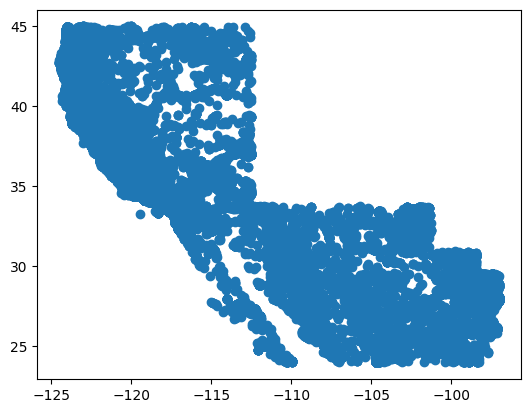

In [8]:
cont_us.plot()

In [29]:
del gdf

In [4]:
## process all the files

In [15]:
parquet_files = os.listdir(f"{overture_root}/theme=places/type=place")

res = []
for pf in parquet_files:
    gdf = gpd.read_parquet(f"{overture_root}/theme=places/type=place/{pf}")
    gdf = gdf.cx[-125:-66, 24:50]
    # Apply the function to the DataFrame column
    gdf.loc[:,'names_value'] = gdf['names'].apply(lambda x: x['common'][0]['value'])
    res.append(gdf[['id','names_value','geometry']])

In [16]:
us_places = pd.concat(res)

In [17]:
us_places.shape

(13867406, 3)

In [18]:
us_places.crs = "EPSG:4326"

In [9]:
us_places.to_file("../../data/overture/us_places.geojson")

In [19]:
us_places.to_parquet("../../data/overture/us_places.parquet")